# Bivariate Exploration
## Diamonds dataset
*By Carla Mota Leal*

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe
diamonds = pd.read_csv('diamonds.csv')

In [3]:
# convert cut, color, and clarity into ordered categorical types
ordinal_var_dict = {'cut': ['Fair','Good','Very Good','Premium','Ideal'],
                    'color': ['J', 'I', 'H', 'G', 'F', 'E', 'D'],
                    'clarity': ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']}

for var in ordinal_var_dict:
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
        ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                    categories = ordinal_var_dict[var])
        diamonds[var] = diamonds[var].astype(ordered_var)
    else: # pre-v0.21
        diamonds[var] = diamonds[var].astype('category', ordered = True,
                                             categories = ordinal_var_dict[var])

## Bivariate Exploration

In the previous notebook, I have looked at the univariate distribution of five features in the diamonds dataset: price, carat, cut, color, and clarity. Now, I'll investigate relationships between pairs of these variables, particularly how each of them relate to diamond price.

To start, I will construct a plot of the price against carat weight. What kind of shape does the relationship between these variables take?

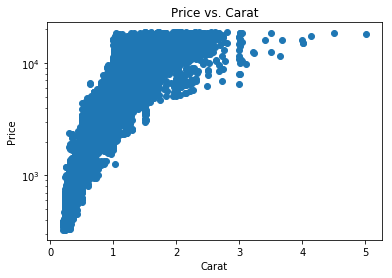

In [6]:
# bivariate plot of price vs. carat
# Creating the scatter plot
plt.scatter(diamonds['carat'], diamonds['price'])

# Set the labels and title
plt.yscale('log')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Price vs. Carat')

# Show the plot
plt.show()

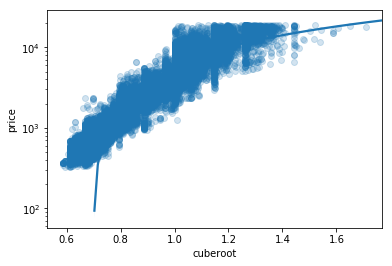

In [5]:
#for a better visualization:
def get_cube_root(num):
    return num ** (1. / 3)

#regression plot with regression line

diamonds['cuberoot'] = diamonds['carat'].apply(lambda x: get_cube_root(x))
sb.regplot(data=diamonds, x='cuberoot', y='price', scatter_kws= {'alpha':1/5});
plt.yscale('log');



> this code calculates the cube root of the 'carat' column values in the 'diamonds' DataFrame, creates a scatter plot with a regression line using the cube root values on the x-axis and the 'price' column on the y-axis, and sets the y-axis scale to logarithmic.

Price vs. Carat comment 1: Since these are both numeric variables, a scatterplot is a natural choice. It could be also consider a heat map for this task. In either case, I should recall that the price distribution suggests a logarithmic transformation due to its very long tail.

Price vs. Carat comment 2: It turns out that the x, y, and z dimensions track a much more linear trend against price than carat does. Since carat is more recognizable a feature value. Since weight is proportional to volume, and since all the diamonds are cut in approximately the same way (round-cut), a cube-root transformation of carat should allow to see an approximately linear trend.

Price vs. Carat comment 3: The trend between price and carat weight is 'cut off' by the maximum price limit of diamonds available in the dataset. For diamonds above about 1.5 carats, would probably expect some diamonds about $20,000 in price, given the trend below 1.5 carats. This would be a point to potentially pay attention to later on with interaction effects between other factors, and when building a model of diamond prices.

Now let's take a look at the relationship between price and the three categorical quality features, cut, color, and clarity. Are there any surprising trends to be seen here?

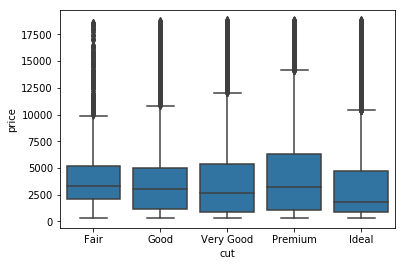

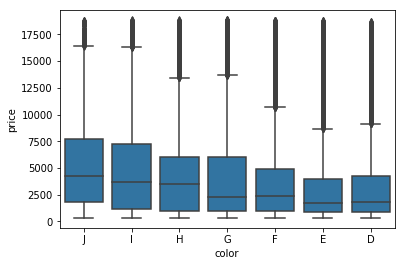

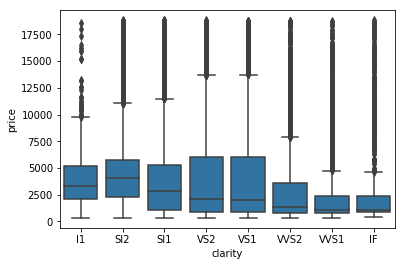

In [10]:
# bivariate plots of price vs. cut, color, clarity
base_color=sb.color_palette()[0];
for c in ['cut', 'color', 'clarity']:
    sb.boxplot(data=diamonds, x=c, y='price', color=base_color);
    plt.show()

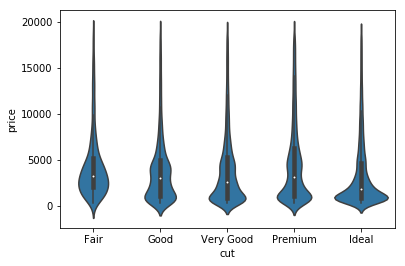

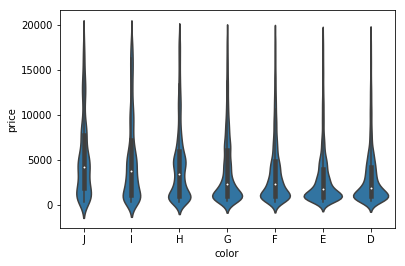

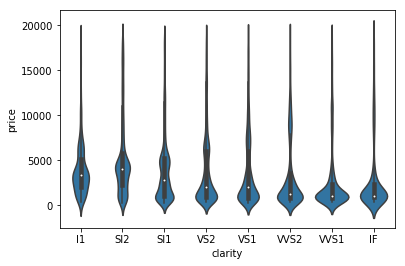

In [9]:
# bivariate plots of price vs. cut, color, clarity
base_color=sb.color_palette()[0];
for c in ['cut', 'color', 'clarity']:
    sb.violinplot(data=diamonds, x=c, y='price', color=base_color);
    plt.show()

Price vs. Categorical comment 1: There's a lot of different approaches I could have taken here. Creating a box plot, I noticed something interesting and unintuitive: the median price of diamonds should tend to look like it _decrease_ with _increasing_ gem quality. Shouldn't we expect this to be the other way around? This deserves a deeper look.

Price vs. Categorical comment 2: With a violin plot, I can get more insight into what causes the trend in median prices to appear as it does. Faceted histograms will also produce a similar result, though unless the faceting keeps the price axis common across facets, the trend will be harder to see. For each ordinal variable, there are multiple modes into which prices appear to fall. Going across increasing quality levels, able to see that the modes rise in price - this should be the expected effect of quality. However, should also see that more of the data will be located in the lower-priced modes - this explains the unintuitive result noted in the previous comment. This is clearest in the clarity variable. Let's keep searching the data to see if there's more we can say about this pattern.

Let's take a look at some of the relationships between the independent variables. Namely, how does carat weight change across the other three 'C' quality measures? I can take the same approach as the above investigation of price against the three categorical quality measures. What can I see in these plots, and how does this relate to earlier investigations?

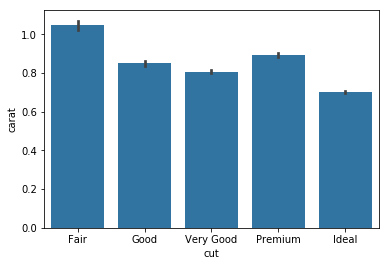

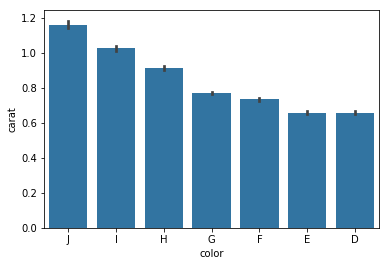

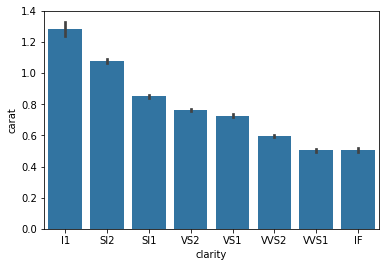

In [8]:
# bivariate plots of carat vs. cut, color, clarity
base_color=sb.color_palette()[0];
for c in ['cut', 'color', 'clarity']:
    sb.barplot(data=diamonds, x=c, y='carat', color=base_color);
    plt.show()

Carat vs. Categorical comment: These plots shed a lot more light into the patterns already seen. Larger diamonds are more likely to receive lower categorical quality grades, while high quality grades are more likely to have their numbers made up of smaller diamonds. Since carat weight appears to be a major driver of price, this helps to explain the surprising marginal effect of diamond quality against price. The challenge next will be on how to depict this in a multivariate plot.